In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')


In [2]:
train_df=pd.read_csv("../input/kepler-labelled-time-series-data/exoTrain.csv")
train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [3]:
#shape of the training df
train_df.shape

(5087, 3198)

We can understand from this data based on the transit for detecting exoplanets that

There are total 5087 stars in this data.
For each star,we have 3197 flux values at different time intervals.
These flux values are used to plot the light curves we saw earlier to detect if a star has exoplanet(s) orbiting it.


In [4]:
#display the rows with null values in df
train_df[train_df.isnull().any(axis = 1)]


,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197


<AxesSubplot:>

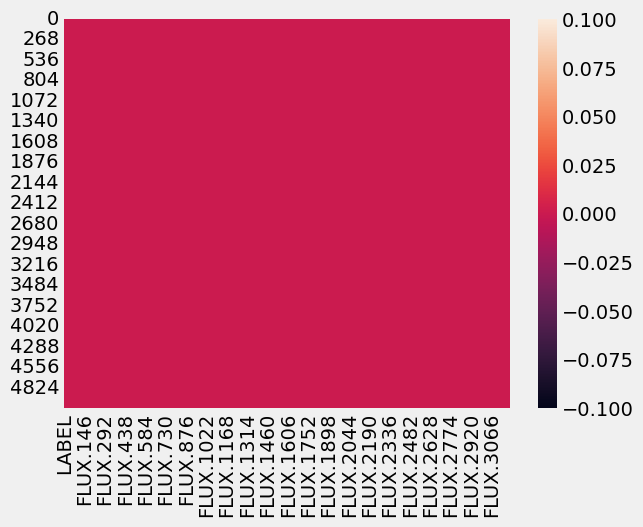

In [5]:
#Display null values in train df
sns.heatmap(train_df.isnull())

* The horizonal dashes in this plot would have indicated the presence of missing values in respective column.
* As there arent any of such dashes seen we can conclude that there are no missing values in this data.

In [6]:
#check how many labels are present in train df
train_df['LABEL'].unique()

array([2, 1])

In [7]:
#extract the index for the stars labelled as 2
list(train_df[train_df['LABEL']==2].index)


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36]

* There are total two classes one is for stars with exoplanets and the other for stars without exoplanets
* very few index for label 2 indicates that this class must belong to stars with exoplanets
* We can also visualise this using countplot

In [8]:
sns.countplot('LABEL', data = train_df)

TypeError: countplot() got multiple values for argument 'data'

In [9]:
#replacing labels
train_df=train_df.replace({"LABEL" : {2 :1,1 :0}})
train_df.LABEL.unique()

array([1, 0])

In [ ]:
plot_df = train_df.drop 